# Programming for Data Science and Artificial Intelligence

## Supervised Learning - Classification - Naive Bayesian - Gaussian

### Readings: 
- [VANDER] Ch5
- [HASTIE] Ch6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gaussian Naive Classification

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(y | x)$ (also known as **posteriors**).
Bayes's theorem tells us how to express this in terms of quantities as:

$$
P(y|x) = \frac{P(x|y)P(y)}{P(x)}
$$

The proof is as follows:

- the probabilty of two events x and y happening, $P(x \cap y)$ is the probability of $x$ or $P(x)$, times the probability of $y$ given that $P(x)$ has occured, $P(y \mid x)$

$$ P(x \cap y) = P(x)P(y \mid x)$$

- on the other hand, the probability of $x$ and $y$ is also equal to the probability of $y$ timese the probabilty of $x$ given $y$

$$ P(x \cap y) = P(y)P(x \mid y)$$

- Equating the two yields:

$$ P(x)P(y \mid x) = P(y)P(x \mid y)$$

- Thus

$$ P(y \mid x) = \frac{P(y)P(x \mid y)}{P(x)}$$

-----


Thus, if we know all these three terms on the right, we can find $P(y \mid x)$ (posteriors).  Since if we want to use for classification, we can simply compare the upper term, thus we need to know two terms!  The $P(y)$ (priors) and $P(x \mid y)$ (likelihoods or conditional probability).

$P(y)$ (also known as **priors**) is simply

$$P(y = 1) = \frac{\sum_{i=1}^m 1(y=1)}{m}$$

$$P(y = 0) = \frac{\sum_{i=1}^m 1(y=0)}{m}$$



In [2]:
X_train = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [9, 10, 11],
    [2, 4, 5]
])

X_test = np.array([
    [2, 3, 4],
    [7, 8, 9]
])

y_train = np.array([0, 0, 1, 0])
y_test = np.array([0, 1])

m0 = len(X_train[y_train==0])
m1 = len(X_train[y_train==1])

prior0 = m0 / (m0 + m1)
prior1 = m1 / (m0 + m1)

print("Prior 0: ", prior0)
print("Priro 1: ", prior1)

Prior 0:  0.75
Priro 1:  0.25


$P(x \mid y)$ (also known as **likelihoods** or **conditional probability**) is a little bit tricky but if we are willing to make a "naive" assumption, then we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.  Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.  In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution* as follows:

$$ P(x \mid y=1 ; \mu_1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma^{2}}}$$
$$ P(x \mid y=0 ; \mu_0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma^{2}}}$$

where

The mean of feature $j$ when $y=0$ is

$$\mu_{0j} = \frac{\sum_{i=1}^m x_{ij}}{m} $$

This is how the normal distribution looks like

<center><img src="../../figures/normal.png" width=400/></center>



In [3]:
#first we need to first mean and variance of each class of each feature
def mean_std(X, y, k):
    n = X.shape[1]
    mean = np.zeros((k, n))
    std = np.zeros((k, n))
    for label in range(k):
        mean[label, :] = X[y==label].mean(axis=0)
        std[label, :]  = X[y==label].std(axis=0)
    return mean, std

mean, std = mean_std(X_train, y_train, k=2)

print("X: ", X_train)
print("y: ", y_train)
print("Mean:\n ", mean)  #shape(k, n)
print("Std:\n ", std)  #shape(k, n)


X:  [[ 1  2  3]
 [ 4  5  6]
 [ 9 10 11]
 [ 2  4  5]]
y:  [0 0 1 0]
Mean:
  [[ 2.33333333  3.66666667  4.66666667]
 [ 9.         10.         11.        ]]
Std:
  [[1.24721913 1.24721913 1.24721913]
 [0.         0.         0.        ]]


In [4]:
#second we can now specify the pdf function
def gaussian_pdf(X, mean, std):
    left = 1 / (np.sqrt(2 * np.pi) * std)
    e = (X - mean) ** 2 / (2 * (std ** 2))
    right = np.exp(-e)
    return left*right

#guassian pdf for class 0 and 1
#Note that I am using X_test, since p(x|y) is looking at "new" evidence
px_y0 = gaussian_pdf(X_test, mean[0, :], std[0, :])
px_y1 = gaussian_pdf(X_test, mean[1, :], std[1, :])

np.set_printoptions(suppress=True)
print("X_test:\n ", X_test)
print("y_test:\n ", y_test)
print("P(x|y=0): ", px_y0)  #shape is same as X_test
print("P(x|y=1): ", px_y1)

#each of them explain the likelihood of these features belong to the class
#for example,  [0.308, 0.277, 0.277] explains the likelihood of each feature of the first sample 
#belonging to class 0

X_test:
  [[2 3 4]
 [7 8 9]]
y_test:
  [0 1]
P(x|y=0):  [[0.30864325 0.27728427 0.27728427]
 [0.00029168 0.00076505 0.00076505]]
P(x|y=1):  [[0.00000005 0.00000005 0.00000005]
 [0.08842777 0.08842777 0.08842777]]


Naive classification assumes all features are independent, thus the total likelihood is just the product:
$$P(x \mid y) = \prod_{i=1}^n P( x_i \mid y )$$

In [5]:
# P(feature1|class0) * P(feature2|class0)
total_likelihood0 = np.prod(px_y0, axis=1)

# P(feature1|class1) * P(feature2|class1)
total_likelihood1 = np.prod(px_y1, axis=1)

print("P(x|y=0): ", px_y0)
print("Total likelihood for class 0: ", total_likelihood0)  #shape is (m, )

print("P(x|y=1): ", px_y1)
print("Total likelihood for class 1: ", total_likelihood1)  #shape is (m, )


P(x|y=0):  [[0.30864325 0.27728427 0.27728427]
 [0.00029168 0.00076505 0.00076505]]
Total likelihood for class 0:  [0.02373052 0.        ]
P(x|y=1):  [[0.00000005 0.00000005 0.00000005]
 [0.08842777 0.08842777 0.08842777]]
Total likelihood for class 1:  [0.         0.00069146]


Finally, do $P(y)P(x|y)$

In [6]:
posterior0 = prior0 * total_likelihood0    
posterior1 = prior1 * total_likelihood1

print("posterior 0: ", posterior0)
print("posterior 1: ", posterior1)

posterior 0:  [0.01779789 0.        ]
posterior 1:  [0.         0.00017286]


Predict based on which one is bigger.

In [7]:
yhat = 1 * posterior1 > posterior0

print(yhat)   #why we don't need to compute P(x)?

[False  True]


### Putting everything together

1. Prepare your data
    - $\mathbf{X}$ and $\mathbf{y}$ in the right shape
        - $\mathbf{X}$ -> $(m, n)$
        - $\mathbf{y}$ -> $(m,  )$
        - Note that theta is not needed.  Why?
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Calculate the mean and std of each feature for each class (from the X_train). 
    $$\mu_{0j} = \frac{\sum_{i=1}^m x_{ij}}{m} $$
   The shape of your mean and std will be $(k, n)$
3. Calculate the **likelihoods** of each sample of each feature (for X_test) using

    $$ P(x \mid y=1 ; \mu_1, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_1)^{2}}{2\sigma^{2}}}$$
    $$ P(x \mid y=0 ; \mu_0, \sigma^{2}) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e ^{-\frac{(x-\mu_0)^{2}}{2\sigma^{2}}}$$
    
    - The shape of likelihood for class 0 will be $(m, n)$
    - Total likelihood is the product as follows:
    
    $$p(x \mid y) = \prod_{i=1}^n p(x_i \mid y)$$
    
    - The shape of this total likelihood for class 0 will be $(m, )$
    
4. Find **priors** P(y)
$$P(y = 1) = \frac{\Sigma_{i=1}^m 1(y=1)}{m}$$
$$P(y = 0) = \frac{\Sigma_{i=1}^m 1(y=0)}{m}$$

    - The shape of priors for class 0 will be simply a scalar

5. Multiply $P(y)P(x \mid y)$ for each class which will give us $p(y \mid x)$ (**posteriors**)
    
    - For each class, the result of this is simply a multiplication between scalar and $(m, )$ resulting in a shape of $(m, )$, and you will have $k$ of such result.

6. Simply compare $P(y)P(x \mid y)$ for each class, whichever is bigger wins.  Note that we can ignore $P(x)$ since they can be canceled on both sides.

#### 1. Prepare your data

#### 1.1 Get your X and y in the right shape

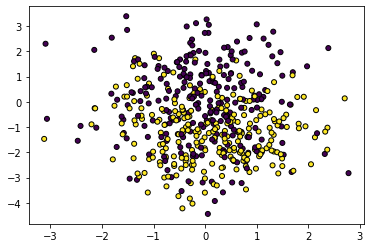

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# generate quite a lot of noise
# with only 4 informative features out of 10
# with 2 redundant features, overlapping with that 4 informative features
# and 4 noisy features
# Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=10, n_redundant=2, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# look at the data...it is likely not linearly separable!

#### 1.2 Feature scale your data to reach faster convergence

In [9]:
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 2. Calculate the mean and std for each feature for each class

In [11]:
def mean_std(X_train, y_train):
    n = X_train.shape[1]
    mean = np.zeros((2, n))
    std = np.zeros((2, n))
    for label in [0, 1]:
        mean[label, :] = X_train[y_train==label].mean(axis=0)
        std[label, :]  = X_train[y_train==label].std(axis=0)
    return mean, std

mean, std = mean_std(X_train, y_train)
assert mean.shape == (2, X_train.shape[1])
assert std.shape == (2, X_train.shape[1])

#### 3. Define the probability density function so we can later calculate $p(x \mid y)$

In [12]:
# scipy.stats.multivariate_normal is a library with this .pdf function
# but I just code from scratch for you to see
def gaussian_pdf(X, mean, std):
    left = 1 / (np.sqrt(2 * np.pi) * std)
    e = (X - mean) ** 2 / (2 * (std ** 2))
    right = np.exp(-e)
    return left*right

#### 3. Calculate the likelihood by calculating the probability density of each class $p(x \mid y)$

In [13]:
#guassian pdf for class 0 and 1
#Note that I am using X_test, since p(x|y) is looking at "new" evidence
likelihood0 = gaussian_pdf(X_test, mean[0, :], std[0, :])
likelihood1 = gaussian_pdf(X_test, mean[1, :], std[0, :])

print(likelihood0.shape)

#pdf should have probability of each sample for each feature
assert likelihood0.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf0!"
assert likelihood1.shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf1!"

(150, 10)


#### 3.1 Calculate thetotal likelihood by calculating the product of $p(x \mid y) = \prod_{i=1}^n p(x = i \mid y)$

In [14]:
# np.product
# P(feature1|class0) * P(feature2|class0)
total_likelihood0 = np.prod(likelihood0, axis=1)

# P(feature1|class1) * P(feature2|class1)
total_likelihood1 = np.prod(likelihood1, axis=1)

print(total_likelihood0.shape)

(150,)


#### 4. Calculate the prior $p(y)$

In [15]:
# probability for class 0 and 1
m0 = len(X_train[y_train==0])
m1 = len(X_train[y_train==1])
prior0 = m0 / (m0 + m1)
prior1 = m1 / (m0 + m1)

assert prior0 + prior1 == 1, "probability not equal 1"

#### 5. Calculate the posterior $p(x \mid y)p(y)$ for each class

In [16]:
# P(class0) * P(feature1|class0) * P(feature2|class0)
posterior0 = prior0 * total_likelihood0    
# P(class1) * P(feature1|class1) * P(feature2|class1)
posterior1 = prior1 * total_likelihood1

#### 6. Calculate accuracy

In [17]:
#if probability of class 1 is more than 0, then True
yhat = 1 * posterior1 > posterior0
    
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7808010335917313
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.69      0.84      0.76        64
           1       0.86      0.72      0.78        86

    accuracy                           0.77       150
   macro avg       0.78      0.78      0.77       150
weighted avg       0.79      0.77      0.77       150



### Sklearn

Of course, once we are able to code from scratch, we can turn to our sklearn so we don't need to implement from scratch from now.  Naive Bayes Gaussian is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [19]:
yhat = model.predict(X_test)
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.8126356589147287
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.71      0.89      0.79        64
           1       0.90      0.73      0.81        86

    accuracy                           0.80       150
   macro avg       0.81      0.81      0.80       150
weighted avg       0.82      0.80      0.80       150



We can also use predict_proba to print out the actual probabilities

In [20]:
yprob = model.predict_proba(X_test)
yprob[-8:].round(2)

array([[0.98, 0.02],
       [1.  , 0.  ],
       [0.91, 0.09],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.97, 0.03],
       [0.01, 0.99]])

### ===Task===

Generate a 2 class data using sklearn, and use them on Gaussian Naive Classification.  Put them into class and calculate accuracy accordingly.